## Standardization and Normalization

**Min-max Normalization**: Normalizes quantitative variable to numbers between 0 and 1

In [2]:
import pandas as pd
df=pd.read_csv("/Users/cwbenton/MATH4140/datasets/winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Standard Scaler
Subtract the mean value and divide it by the standard deviation. This puts your data into a Gaussian distribution. This ensures our data has a mean of 0 and standard deviation of 1.

<img src="/Users/cwbenton/MATH4140/Images/standard.png" style="height:100px">

# Robust Scaler

Notice how this is not sensitive to outliers.

<img src="/Users/cwbenton/MATH4140/Images/ROBUST.png" style="height:100px">

# Min-Max Normalization
<img src="/Users/cwbenton/MATH4140/Images/min_max.png" style="height:100px">

## Standardization Techniques

In [4]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(df[['fixed acidity','citric acid','total sulfur dioxide','alcohol']])
minmax = pd.DataFrame(minmax,columns=['fixed acidity','citric acid','total sulfur dioxide','alcohol'])

scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(df[['fixed acidity','citric acid','total sulfur dioxide','alcohol']])
standard = pd.DataFrame(standard,columns=['fixed acidity','citric acid','total sulfur dioxide','alcohol'])

scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(df[['fixed acidity','citric acid','total sulfur dioxide','alcohol']])
robust = pd.DataFrame(robust,columns=['fixed acidity','citric acid','total sulfur dioxide','alcohol'])

(array([4.000e+01, 1.133e+03, 1.662e+03, 1.156e+03, 1.092e+03, 6.280e+02,
        5.690e+02, 1.750e+02, 4.100e+01, 1.000e+00]),
 array([ 8.  ,  8.69,  9.38, 10.07, 10.76, 11.45, 12.14, 12.83, 13.52,
        14.21, 14.9 ]),
 <BarContainer object of 10 artists>)

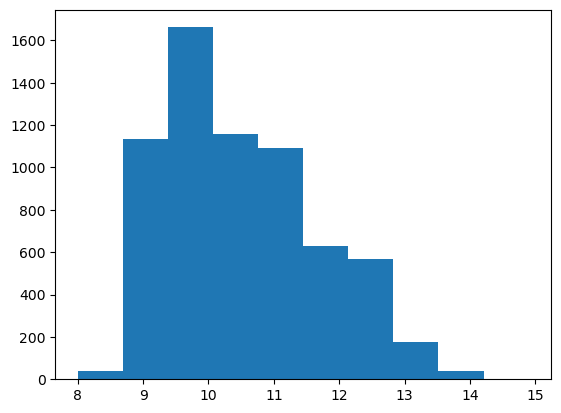

In [5]:
import matplotlib.pyplot as plt
plt.hist(df['alcohol'])

(array([4.000e+01, 1.133e+03, 1.662e+03, 1.156e+03, 1.096e+03, 6.240e+02,
        5.690e+02, 1.750e+02, 4.100e+01, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

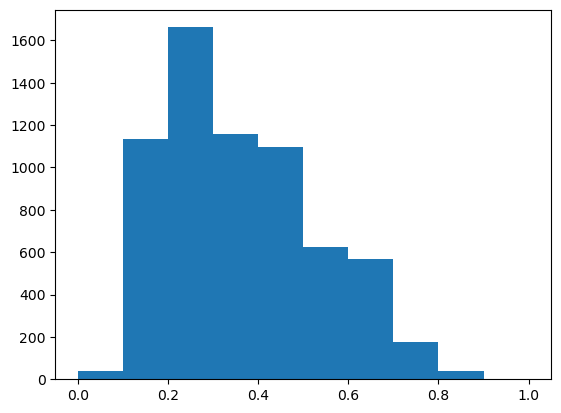

In [7]:
# Same histogram as raw data, but the values are between 0 and 1 now.
plt.hist(minmax['alcohol'])

(array([4.000e+01, 1.133e+03, 1.662e+03, 1.156e+03, 1.096e+03, 6.240e+02,
        5.690e+02, 1.750e+02, 4.100e+01, 1.000e+00]),
 array([-2.08935027, -1.51079212, -0.93223397, -0.35367581,  0.22488234,
         0.8034405 ,  1.38199865,  1.9605568 ,  2.53911496,  3.11767311,
         3.69623127]),
 <BarContainer object of 10 artists>)

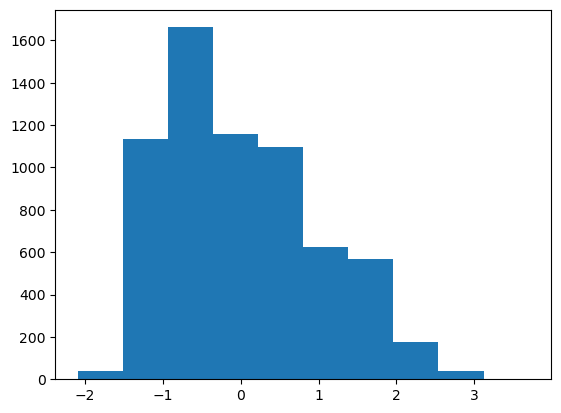

In [9]:
# Again, the histogram is the same, but we can see that the standard deviation is 1 with a mean of 0.
plt.hist(standard['alcohol'])

(array([4.000e+01, 1.133e+03, 1.662e+03, 1.156e+03, 1.096e+03, 6.240e+02,
        5.690e+02, 1.750e+02, 4.100e+01, 1.000e+00]),
 array([-1.27777778, -0.89444444, -0.51111111, -0.12777778,  0.25555556,
         0.63888889,  1.02222222,  1.40555556,  1.78888889,  2.17222222,
         2.55555556]),
 <BarContainer object of 10 artists>)

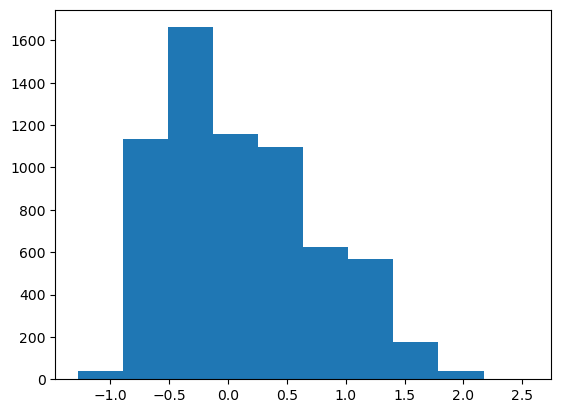

In [11]:
plt.hist(robust['alcohol'])